## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Importing Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib nbagg
%matplotlib inline

## Reading and Exploring Data 

In [2]:
# reading the DataFrame 
df= pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# checking number of rows and columns also columns names
print(f'This is the number of rows and columns in our dataframe :' , {df.shape})


This is the number of rows and columns in our dataframe : {(21597, 21)}


In [4]:
# columns names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# checking data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**we can see that our data types are float64(6), int64(9) and object(6)**


## Data Cleaning 

In [6]:
# checking for duplicate 
duplicate = df[df.duplicated()]
print(f'the number of duplicated rows are:',  len(duplicate))

the number of duplicated rows are: 0


**we can conclude that our data has no duplicates the return `0 duplicate`**

In [7]:
# checking for missing values 
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**we have missing values in `waterfront (2376)`,`view (63)` and `yr_renovated (3842)` which we have to deal with**

### Dealing with missing values 

In [8]:
# checking the content and number_counts  of waterfront column
print(f'waterfront column contains :', df['waterfront'].unique())
print(f'view column contains :', df['view'].unique())
print(f'yr_renovated column contains :', df['waterfront'].unique())
# checking counts
print(f' waterfront counts is :', df['waterfront'].value_counts())
print(f' view counts is :', df['view'].value_counts())
print(f' yr_renovatedt counts is :', df['yr_renovated'].value_counts())

waterfront column contains : [nan 'NO' 'YES']
view column contains : ['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
yr_renovated column contains : [nan 'NO' 'YES']
 waterfront counts is : waterfront
NO     19075
YES      146
Name: count, dtype: int64
 view counts is : view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64
 yr_renovatedt counts is : yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64


In [9]:
# since the number of 'NO'(19075) is higher than nUmber of 'YES'(146)
# we can replace 'nan' with 'NO'
df['waterfront'].fillna('NO', inplace=True)
# replacing 'nan' with 'NONE'
df['view'].fillna('NONE',inplace=True)
# replacing 'nan' with 0.0
df['yr_renovated'].fillna(0.0,inplace=True)

In [10]:
# confirming the existence of missing values 
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Great! now we have dealt with missing values and no column with missing values**

### changing data types to Numbers


* in the given data we have 6 objects data types and we need to change these objects to numbers for modeling purpose

In [11]:
# Take apart the date column, put it into three columns as day month and year and have the values numeric.
# changing the date column into date datatypes 
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] = df['date'].map(lambda x: x.year)
# then dropping the date column
df.drop('date', axis=1, inplace=True)

In [12]:
#  creating numerical values with columns: view,condition and grade from categorical values 

df.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

df.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}, inplace=True)

df.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)

In [13]:
# confirming values in sqft_basement column
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [14]:
#on the code above we see that strings of numbers and ? sign 
#Convert all the ? values to 0.0 then convert from strings to float
df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'}).astype(float)


In [15]:
# replacing NO and YES from waterfront with 0 and 1
df['waterfront'] = df['waterfront'].map({'NO': 0, 'YES': 1})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

**Our data now contains only numeric data types**

### Removing Outliers 

We decided to use 3 standard deviations from the mean to remove any outliers in our data set. 
Our best approach here was to remove any data points that were outside of 3 standard deviations. This would give us 99.7% of the data surrounding the mean. We believe that this would give us a better set and allow our linear regression model to perform better.

In [17]:
# Calculate Z-scores for each numeric column
z_scores = stats.zscore(df)

# Define a threshold for Z-scores (e.g., 3 standard deviations)
threshold = 3

# Identify rows with outliers
outlier_rows = (z_scores > threshold).any(axis=1)

# Remove outliers from the DataFrame
df_no_outliers = df[~outlier_rows]

# Print the shape of the original and modified DataFrames
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (21597, 21)
DataFrame shape after removing outliers: (18894, 21)


###  Checking  for relationship  between price and independent variables

#### Fig 1

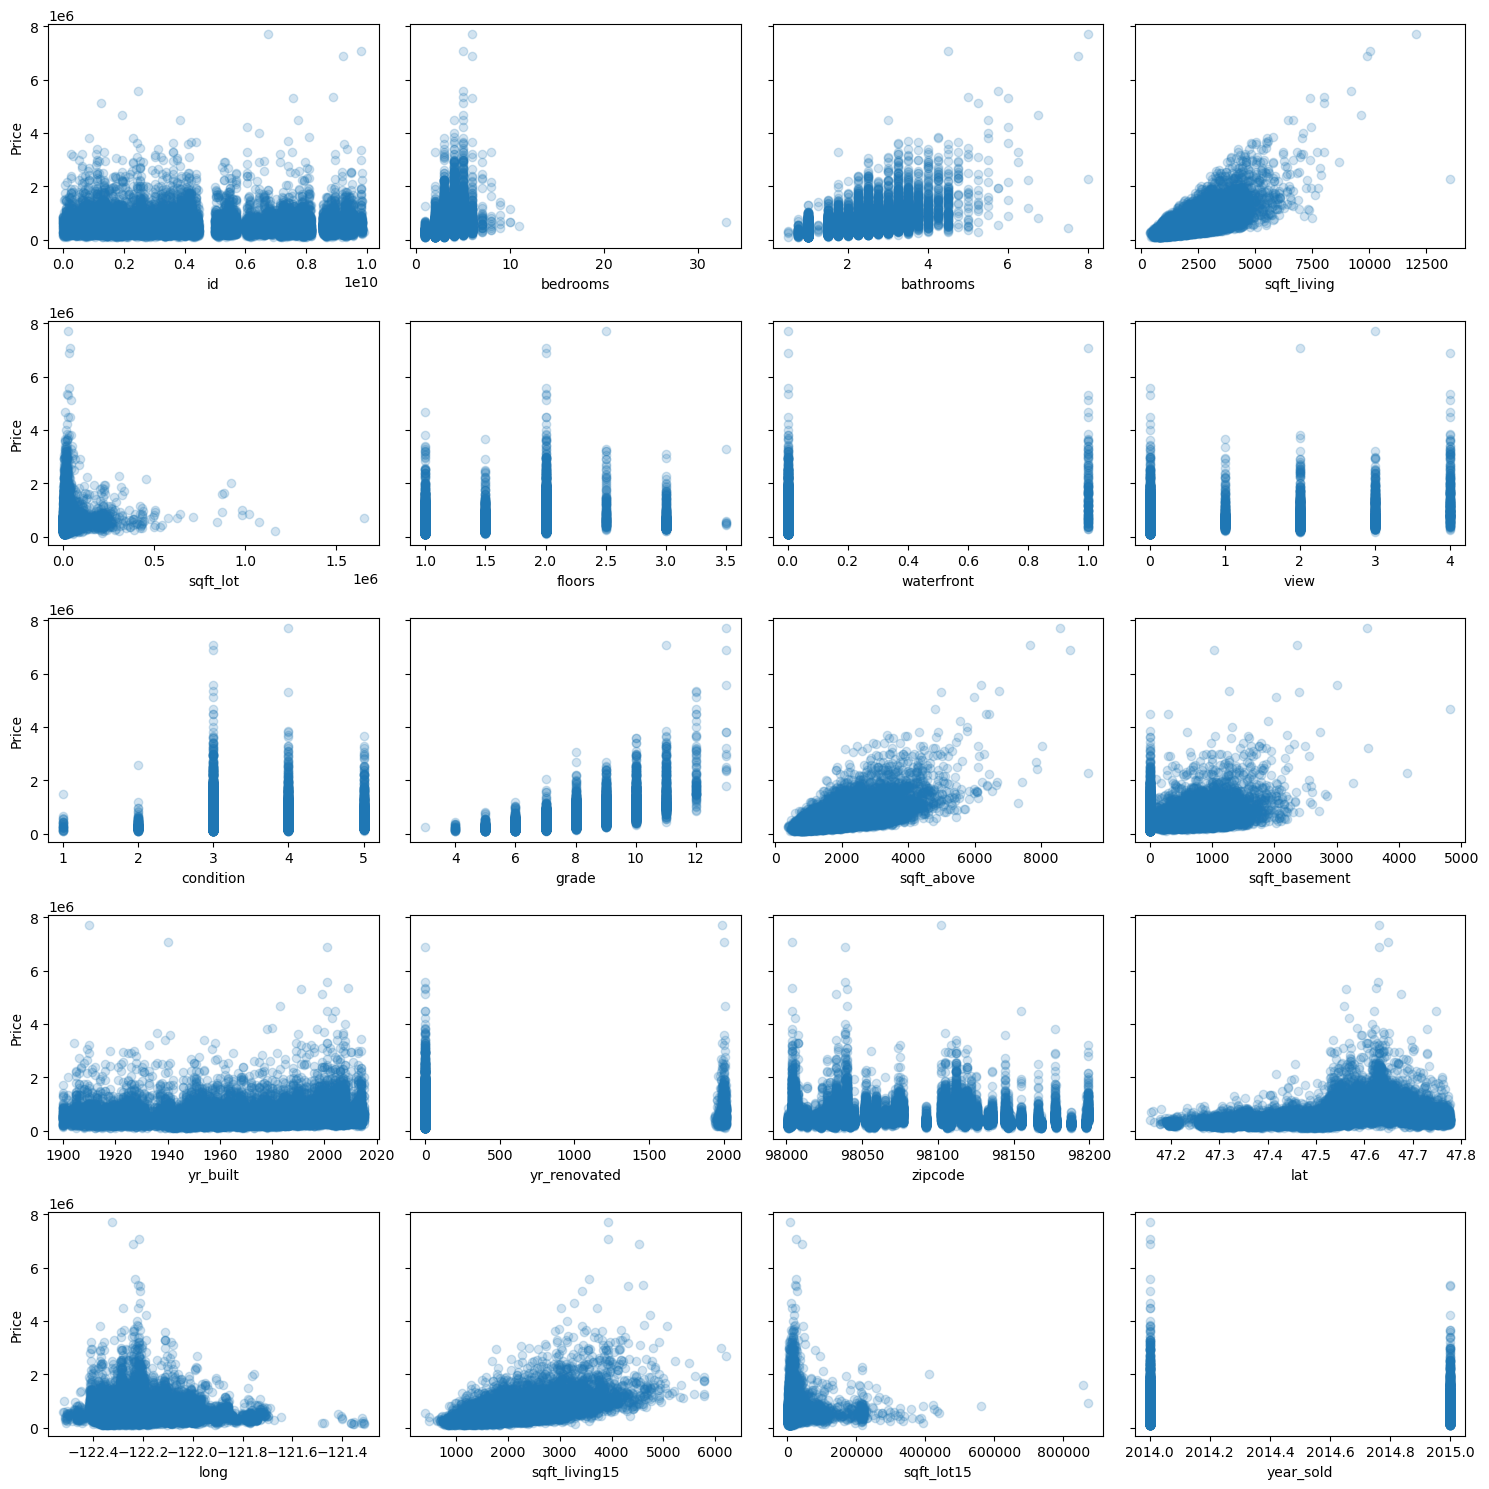

In [18]:
y = df["price"]
X = df.drop("price", axis=1)

# Determine the number of rows and columns dynamically based on the number of features
num_features = X.shape[1]
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("Price")

fig.tight_layout()
plt.show()


###  Simple Linear Model 

#### Correlation Matrix 

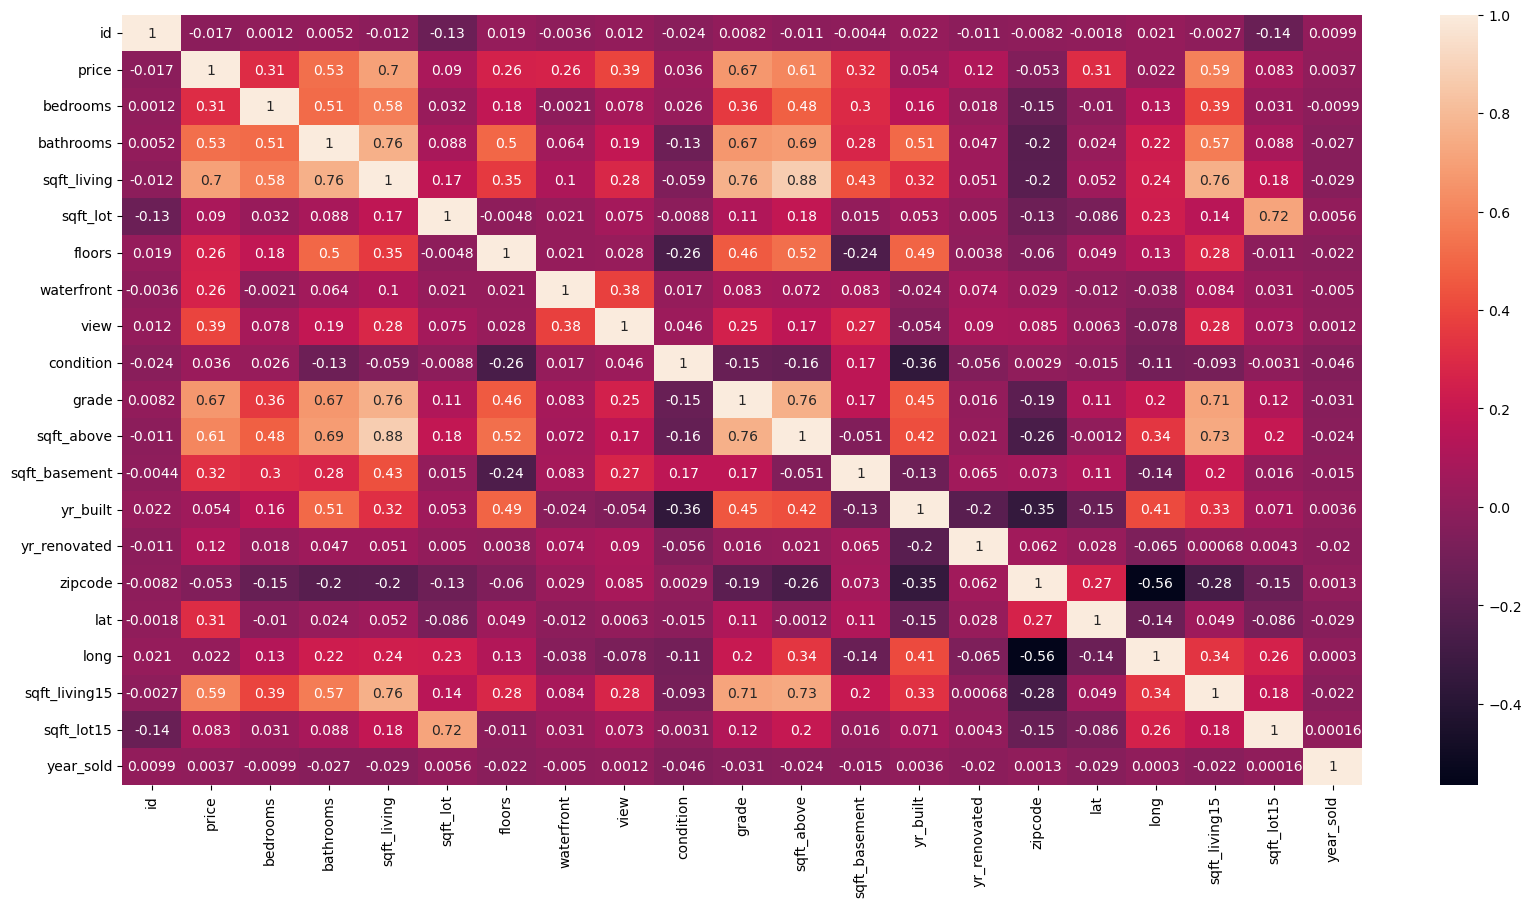

In [19]:
df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=df.corr(), annot=True);

we can see that sqft_ living, grade, sqft_above have the highest correlation with the price We use scatter plots to plot each predictor (sqft_ living, grade, sqft_above) against the target variable which is price. for a clear view we can run correlation vs price 

In [20]:
#correlations between the other variables and price
df.corr()["price"]

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.264306
view             0.393497
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.321108
yr_built         0.053953
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
year_sold        0.003727
Name: price, dtype: float64

#### fig 2

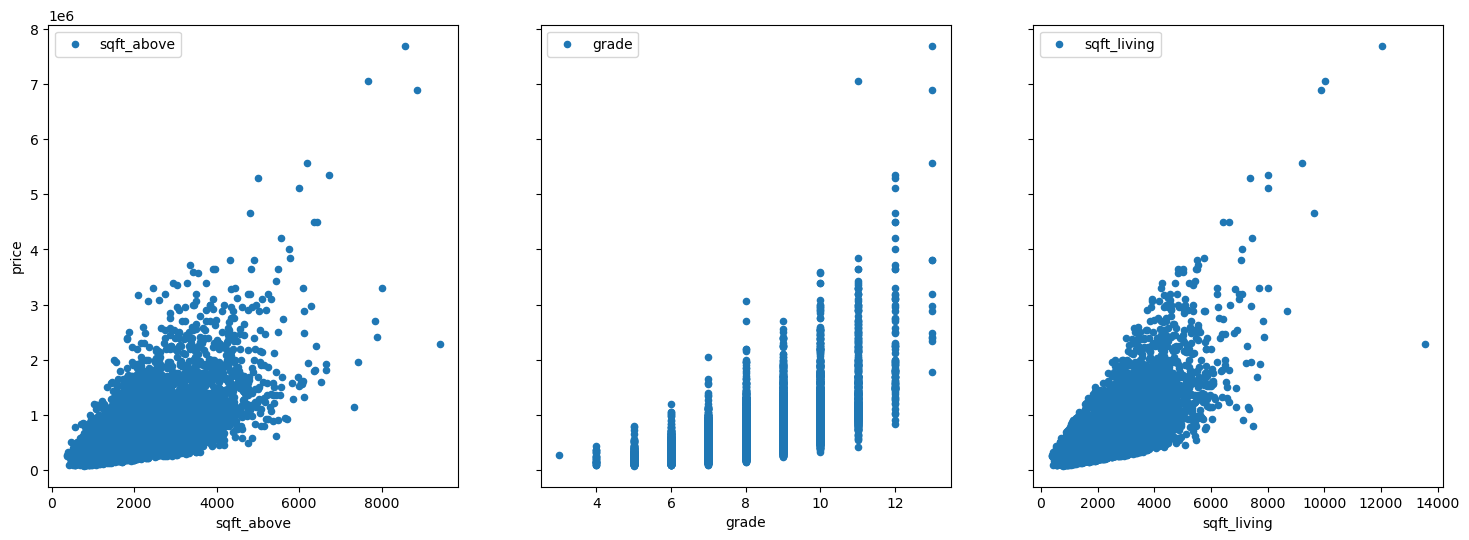

In [21]:
# Visualize the relationship between the sqft_living,sqft_ above and grade  and the target (price) using scatter plots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_above', 'grade', 'sqft_living']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
    axs[idx].legend()

* sqft_living  seems to be a good predictor because it has the most linear relationship with price
* sqft_ above also have a linear relationship, but there is more variance than with sqft_living
* grade has the least linear-looking relationship. There is a lot of variance as well. 

### Model 1 . a

Now that we have sqft_living  seems to be a good predictor because it has the most linear relationship with price.
we adopted as our For that, we'll create a simple model based on this.

In [22]:
y = df["price"]
# Above sqft_living had the highest correlation
X_baseline = df[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:18:25   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

***
Our model is statistically significant overall, and explains about 49.3% of the variance
in price.

Both our intercept and our coefficient for sqft_living are statistically significant.

Our intercept is about -4.399e+04 , meaning that a home with 0 square feet 
living area would lead to a decrease by  -4.399e+04 .

Our coefficient for sqft_living  is about 280.8630, which means that for each additional square
foot living area, we expect the price to increase about $280.8630.
***

In [24]:
X = df.drop("price", axis=1)

multy_model = sm.OLS(y, sm.add_constant(X))
multy_results = multy_model.fit()

print(multy_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2538.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:18:25   Log-Likelihood:            -2.9433e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21576   BIC:                         5.889e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.503e+07   6.59e+06     -8.351


 Our R-squared : 0.7069985738787827

### Model 1 . b(standardize model)
Due to strong multicollinearity we opted to use log transfermotion for a better interprentation of our data.
we do this by transforming both predictor(sqft_living) and target (price )
 

In [25]:
# transforming to  natural log 
df["log_price"]=np.log(df["price"])
df["log_sqft_living"]=np.log(df["sqft_living"])
# Determine X and y values
X = df[["log_sqft_living"]]
y = df["log_price"]
# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()
# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:18:26   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7234      0.047    1

* Overall the model and coefficients are statistically significant, with all p-values well below a standard alpha of 0.05.
* The R-squared value is about 0.455 i.e. 45% of the variance in the target variable can be explained by sqft_living.
* const (Intercept): The intercept of the regression line is 6.7234.
* For each increase of 1% in sqft_living, we see an associated increase of about 0.84% in price

#### Fig 3. a: visualizing baseline model

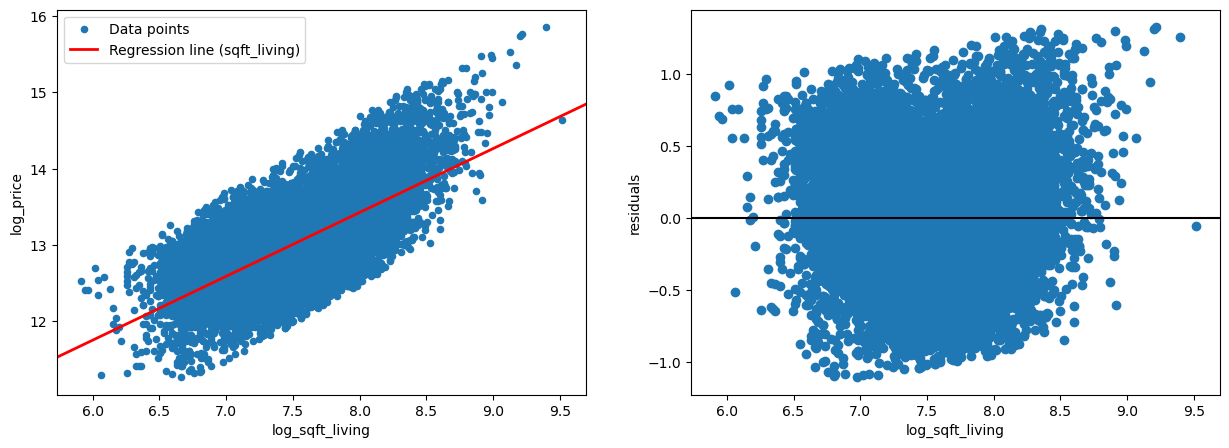

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Scatter plot with regression line
df.plot(x="log_sqft_living", y="log_price", kind="scatter", label="Data points", ax=ax1)
sm.graphics.abline_plot(model_results=results, label="Regression line (sqft_living)", c="red", linewidth=2, ax=ax1)
ax1.legend()

# Residuals plot
ax2.scatter(df["log_sqft_living"], results.resid)
ax2.axhline(y=0, color="black")
ax2.set_xlabel("log_sqft_living")
ax2.set_ylabel("residuals");

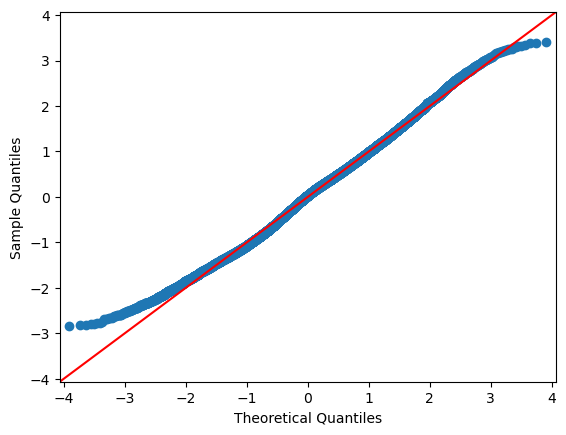

In [27]:

## Creating a QQ Plot
resid = results.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

### Multiple Linear Regression Model

In [29]:
linear_df = df[['sqft_living','condition', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'price']]

In [30]:
#Checking for Multicollinearity between the variables
corr_df=corr_df=linear_df.drop('price', axis=1).corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
corr_df.columns = ['cc']
# Veiwing the highly correlated predictor pairs
corr_df[(corr_df.cc > 0.75) & (corr_df.cc < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758


In [31]:
# We select a set of non-linear dataframe and use it model price
# from our linear data set we drop grade and sqft_above
df_int = linear_df.drop(['sqft_above', 'grade'], axis=1)
df_int

,sqft_living,condition,sqft_living15,bathrooms,price
0,1180,3,1340,1.00,221900.0
1,2570,3,1690,2.25,538000.0
2,770,3,2720,1.00,180000.0
3,1960,5,1360,3.00,604000.0
4,1680,3,1800,2.00,510000.0
...,...,...,...,...,...
21592,1530,3,1530,2.50,360000.0
21593,2310,3,1830,2.50,400000.0
21594,1020,3,1020,0.75,402101.0
21595,1600,3,1410,2.50,400000.0


In [32]:
X = df[["condition","bedrooms", "bathrooms","sqft_living" ]]
y = df["price"]
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()
# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     5730.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:19:23   Log-Likelihood:            -2.9958e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21592   BIC:                         5.992e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.008e+05   1.17e+04     -8.646      

In [33]:
# alpaha value
alpha = results.params["const"]

# Beta Values 
beta1 = results.params["condition"]
beta2 = results.params["sqft_living"]
beta3 = results. params["bedrooms"]
beta4 = results. params["bathrooms"]

print("The constant for the regression line is" +str(round(alpha,2)) +  "$")
print('==================')
print("we predict that an improved condition changes the price by "  +str(round(beta1,3)) +  "$")
print('==================')
print("we predict that one sqft_living changes the price by "  +str(round(beta2,3)) +  "$")
print('==================')
print("we predict that one bedroom changes the price by "  +str(round(beta3,3)) +  "$")
print('==================')
print("we predict that one bathroom changes the price by "  +str(round(beta4,3)) +  "$")

The constant for the regression line is-100847.71$
we predict that an improved condition changes the price by 51161.783$
we predict that one sqft_living changes the price by 308.987$
we predict that one bedroom changes the price by -62742.296$
we predict that one bathroom changes the price by 16798.052$


In [ ]:
r_sqrd = results.rsquared
print("condition, bedrooms, bathrooms and sqft_living explain "  +str(round(r_sqrd,1)) +" % of variationin price." )

In [34]:
keys = list(df_int.corr()['price'].sort_values(ascending=False).index)
keys[1] = 'condition'
keys[2] = 'bedrooms'
keys[3] = 'sqft_living'
keys[4] = 'Bathrooms'

values = list(df_int.corr()['price'].sort_values(ascending=False))

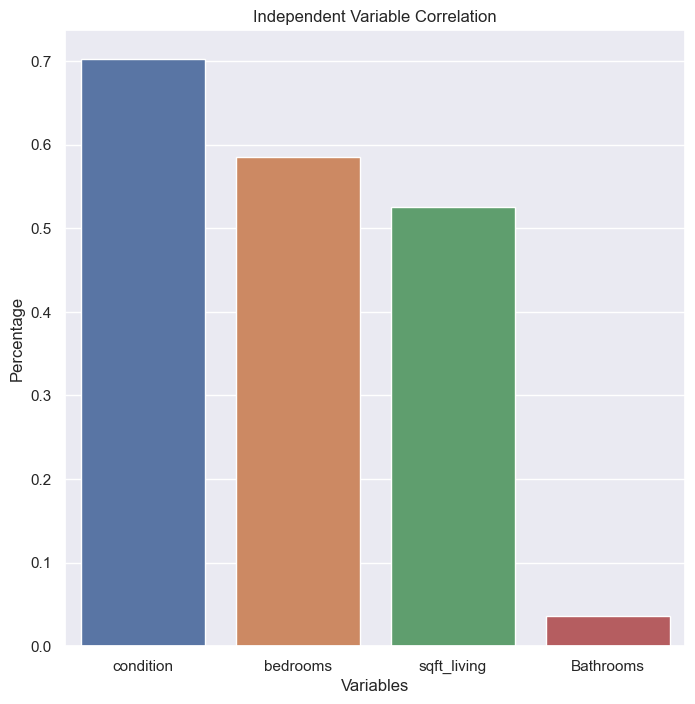

In [35]:
sns.set(rc={'figure.figsize': (8, 8)})
sns.barplot(x=keys[1:], y=values[1:]).set(title='Independent Variable Correlation', xlabel='Variables', ylabel='Percentage')

# Show the plot
plt.show()

#### Stardadized  MultiRegression model 


In [36]:
df_int = df[[ "condition","bedrooms", "bathrooms", "sqft_living", "price"]]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
df_int_standardized = pd.DataFrame(scaler.fit_transform(df_int), columns=df_int.columns)

# Display the standardized DataFrame
print(df_int_standardized.head())

   condition  bedrooms  bathrooms  sqft_living     price
0  -0.629986 -0.402903  -1.451073    -0.980652 -0.866716
1  -0.629986 -0.402903   0.174486     0.533369 -0.006252
2  -0.629986 -1.482493  -1.451073    -1.427234 -0.980773
3   2.444427  0.676687   1.149821    -0.131057  0.173409
4  -0.629986 -0.402903  -0.150626    -0.436040 -0.082471


In [37]:
df_int_standardized = sm.add_constant(df_int_standardized)

# Specify the dependent variable ('log_price') and independent variables
y = df_int_standardized['price']
X = df_int_standardized.drop('price', axis=1)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     5730.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:21:13   Log-Likelihood:                -22832.
No. Observations:               21597   AIC:                         4.567e+04
Df Residuals:                   21592   BIC:                         4.571e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.469e-17      0.005  -7.32e-15      

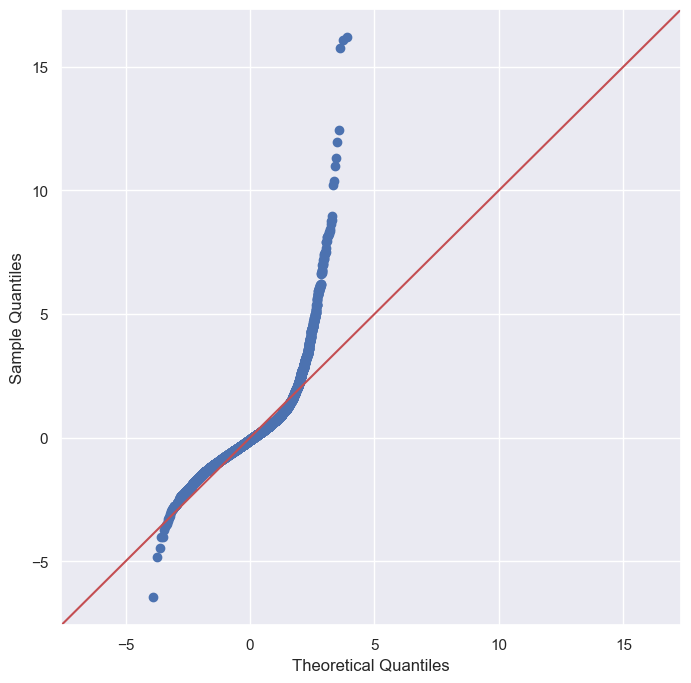

In [38]:
## Creating a QQ Plot

resid = model.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);

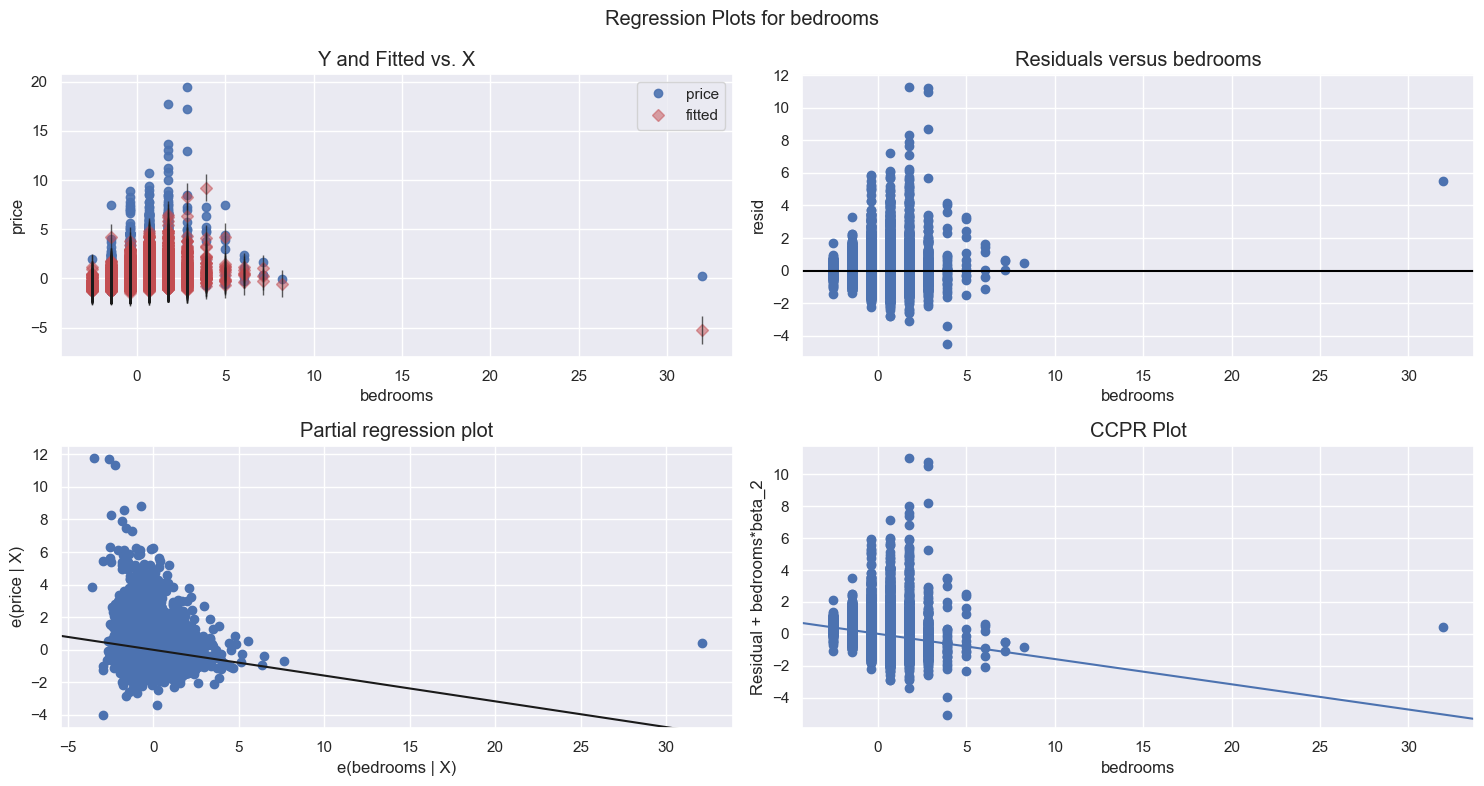

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

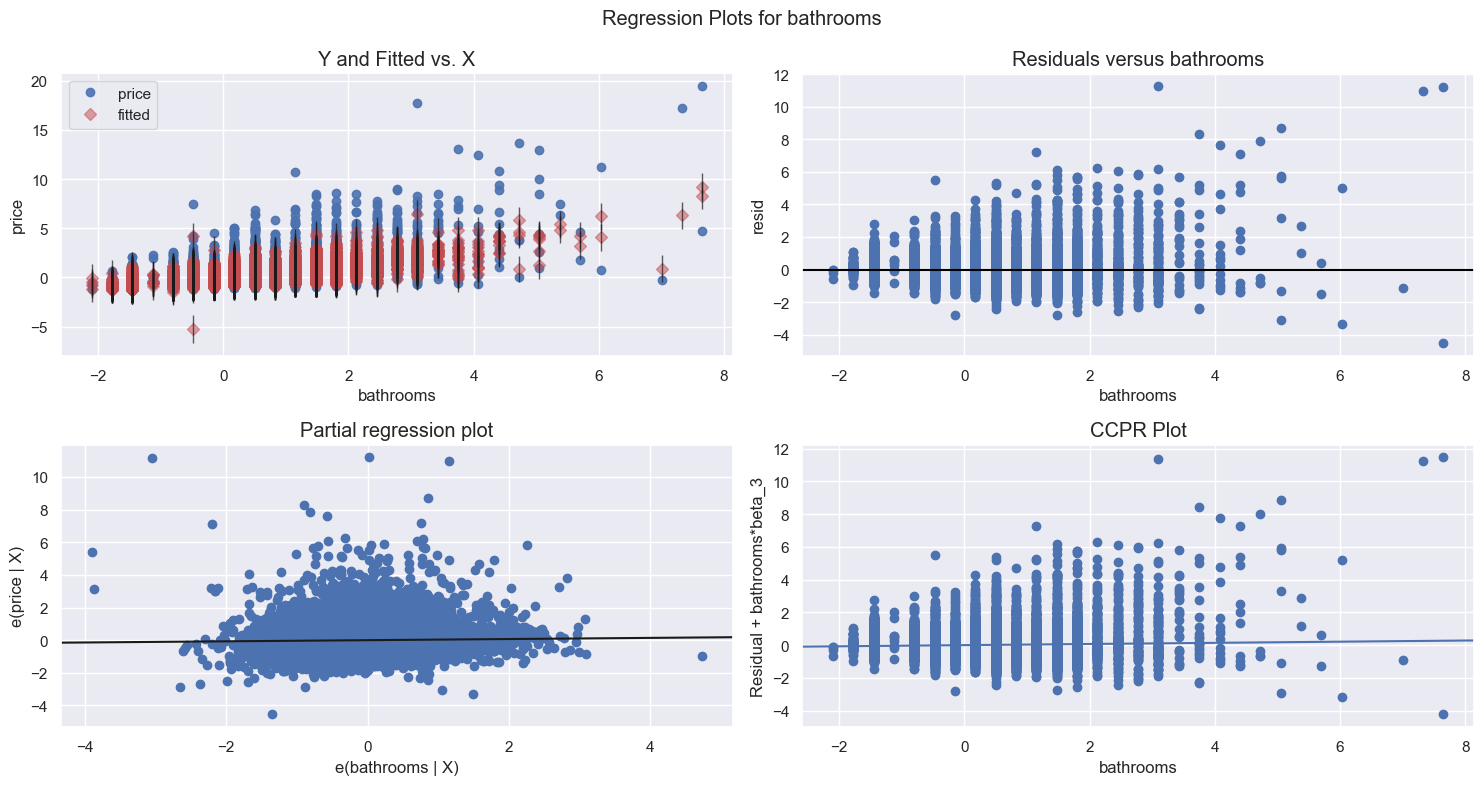

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

In order to have a clear effect of condition to price we split into 5 sections where 1 - is worst and 5 is best

In [41]:
# 'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5
condition_mapping = {'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}

# Mapping 'condition' values
df['condition'] = df['condition'].map(condition_mapping)

# Splitting DataFrame based on condition
worst_condition_df = df_int[df_int['condition'] == 1]
fair_condition_df = df_int[(df_int['condition'] > 1) & (df_int['condition'] < 5)]
best_condition_df = df_int[df_int['condition'] == 5]

# Calculating and printing average prices
worst_average = worst_condition_df['price'].mean()
fair_average = fair_condition_df['price'].mean()
best_average = best_condition_df['price'].mean()

print(f"Worst Condition Average Price: {worst_average}")
print(f"Fair Condition Average Price: {fair_average}")
print(f"Best Condition Average Price: {best_average}")

Worst Condition Average Price: 341067.2413793103
Fair Condition Average Price: 534398.7219006392
Best Condition Average Price: 612577.7425044092


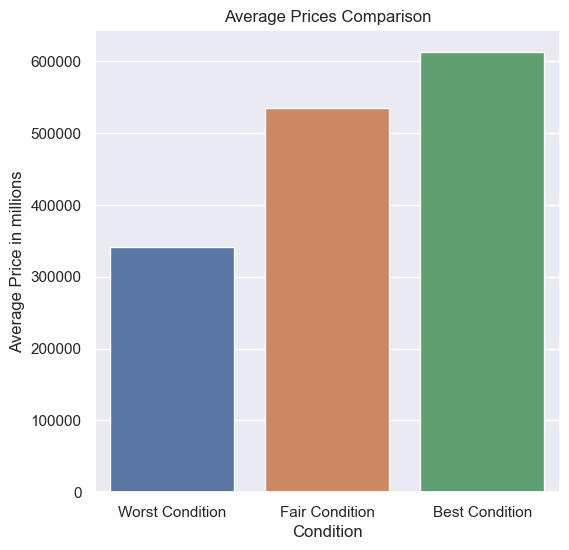

In [42]:
# Plotting a bar graph
sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=['Worst Condition', 'Fair Condition', 'Best Condition'], y=[worst_average, fair_average, best_average]).set(
    title='Average Prices Comparison',
    xlabel='Condition',
    ylabel='Average Price in millions',
    
)

# Show the plot
plt.show()

### Summary 

Bathrooms have a negative correlation. The explanation for this may be, .....
Condition have a positive.......
number of bedrooms ......
sqft_living .......